In [1]:
import pandas as pd
import numpy as np
import math
import json


from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer, MinMaxScaler
import seaborn as sns #For Data visualization
import matplotlib.pyplot as plt #Data plotting and visualization
sns.set_palette(sns.color_palette('Set2'))
import plotly.express as px
%matplotlib inline


In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

In [3]:
from datetime import datetime
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer
from sklearn.cluster import KMeans

In [4]:
#Import functions
from clean_data import clean_portfolio, clean_profile, clean_transcript


portfolio_df = clean_portfolio(portfolio)

profile_da, profile_m = clean_profile(profile)

offers,transactions = clean_transcript(transcript)


In [5]:
profile_da

,customer_id,gender,age,age_group,customer_income,customer_income_range,became_member_on,membership_year
0,0610b486422d4921ae7d2bf64640c50b,F,55,GenXers(44-56),112000.0,$100K,2017-07-15,2017
1,78afa995795e4d85b5d9ceeca43f5fef,F,75,Boomers(57-75),100000.0,$100K,2017-05-09,2017
2,e2127556f4f64592b11af22de27a7932,M,68,Boomers(57-75),70000.0,"$50,000 - $74,999",2018-04-26,2018
3,389bc3fa690240e798340f5a15918d5c,M,65,Boomers(57-75),53000.0,"$50,000 - $74,999",2018-02-09,2018
4,2eeac8d8feae4a8cad5a6af0499a211d,M,58,Boomers(57-75),51000.0,"$50,000 - $74,999",2017-11-11,2017
...,...,...,...,...,...,...,...,...
14820,6d5f3a774f3d4714ab0c092238f3a1d7,F,45,GenXers(44-56),54000.0,"$50,000 - $74,999",2018-06-04,2018
14821,2cb4f97358b841b9a9773a7aa05a9d77,M,61,Boomers(57-75),72000.0,"$50,000 - $74,999",2018-07-13,2018
14822,01d26f638c274aa0b965d24cefe3183f,M,49,GenXers(44-56),73000.0,"$50,000 - $74,999",2017-01-26,2017
14823,9dc1421481194dcd9400aec7c9ae6366,F,83,Matures(76+),50000.0,"$50,000 - $74,999",2016-03-07,2016


In [6]:
profile_da[['customer_income']].min()

customer_income    30000.0
dtype: float64

In [7]:
portfolio_df

,offer_id,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,ae264e3637204a6fb9bb56bc8210ddfd,offer_1,bogo,10,7,10,1,1,1,0
1,4d5c57ea9a6940dd891ad53e9dbe8da0,offer_2,bogo,10,5,10,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,offer_3,informational,0,4,0,1,1,0,1
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer_4,bogo,5,7,5,1,1,0,1
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,offer_5,discount,20,10,5,1,0,0,1
5,2298d6c36e964ae4a3e7e9706d1fb8c2,offer_6,discount,7,7,3,1,1,1,1
6,fafdcd668e3743c1bb461111dcafc2a4,offer_7,discount,10,10,2,1,1,1,1
7,5a8bc65990b245e5a138643cd4eb9837,offer_8,informational,0,3,0,1,1,1,0
8,f19421c1d4aa40978ebb69ca19b0e20d,offer_9,bogo,5,5,5,1,1,1,1
9,2906b810c7d4411798c6938adc9daaa5,offer_10,discount,10,7,2,1,1,0,1


In [8]:
offers_portfolio = pd.merge(offers, portfolio_df, left_on='offer_id', right_on='offer_id', how='inner')

In [9]:
offers_portfolio

,customer_id,event,time_in_days,offer_id,completed,received,viewed,offer_name,offer_type,offer_difficulty,offer_duration,offer_reward,email,mobile,social,web
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1
1,ebe7ef46ea6f4963a7dd49f501b26779,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1
2,f082d80f0aac47a99173ba8ef8fc1909,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1
3,c0d210398dee4a0895b24444a5fcd1d2,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1
4,57dd18ec5ddc46828afb81ec5977bef2,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,1,0,offer_4,bogo,5,7,5,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167576,642b6f1bf61040efb73e1859cf00e79e,offer viewed,29,5a8bc65990b245e5a138643cd4eb9837,0,0,1,offer_8,informational,0,3,0,1,1,1,0
167577,5a3f7fcb450a4cb693ab5267b4d49b40,offer viewed,29,5a8bc65990b245e5a138643cd4eb9837,0,0,1,offer_8,informational,0,3,0,1,1,1,0
167578,ec1761735b034ae8874bc979f0cd5862,offer viewed,29,5a8bc65990b245e5a138643cd4eb9837,0,0,1,offer_8,informational,0,3,0,1,1,1,0
167579,d56386cf344c4829bbf420d1895dca37,offer viewed,29,5a8bc65990b245e5a138643cd4eb9837,0,0,1,offer_8,informational,0,3,0,1,1,1,0


In [10]:
def offer_success(column):

    offer_name = offers_portfolio[column].unique()

    all_res = []
    for offer in offer_name:

        success = offers_portfolio[offers_portfolio[column] == offer].groupby(['customer_id']).agg({'received': 'sum' ,
                                                                                                          'viewed':'sum' ,
                                                                                                          'completed': 'sum'})
        offer_count= success.add_suffix('_count')
        col_name = list(offer_count.columns)
        offer_count['view_rate'] = offer_count[col_name[1]]/offer_count[col_name[0]]
        offer_count['completed_rate'] = offer_count[col_name[2]]/offer_count[col_name[1]]
        offer_count[offer_count['completed_rate']> 1] = 1
        offer_count = offer_count.add_prefix(column+'_'+str(offer)+'_')
        #offer_count.reset_index(inplace=True)

        all_res.append(offer_count)
    
    return all_res


In [11]:
def offer_success_2(offers_portfolio):
    
    all_res = []
    
    columns = ['mobile','social','web']
    for column in columns:
        success = offers_portfolio[(offers_portfolio[column] == 1) & (offers_portfolio['offer_type'] != "informational")].groupby(['customer_id']).agg({'received': 'sum' ,'viewed':'sum' ,'completed': 'sum'})
        
        offer_count= success.add_suffix('_count')
        col_name = list(offer_count.columns)
        offer_count['view_rate'] = offer_count[col_name[1]]/offer_count[col_name[0]]
        offer_count['completed_rate'] = offer_count[col_name[2]]/offer_count[col_name[1]]
        offer_count[offer_count['completed_rate']> 1] = 1
        offer_count = offer_count.add_prefix(column+'_')
        #offer_count.reset_index(inplace=True)
        
        all_res.append(offer_count)
        
    return all_res

In [12]:
offer_duration    = offer_success(column = 'offer_duration')

offer_duration_7  = offer_duration[0]#7
offer_duration_10 = offer_duration[1]#10
offer_duration_5  = offer_duration[2]#5
#offer_duration_4  = offer_duration[3]#4
#offer_duration_3  = offer_duration[4]#3


offer_difficulty    = offer_success(column = 'offer_difficulty')

offer_difficulty_5  = offer_difficulty[0]#5
offer_difficulty_20 = offer_difficulty[1]#20
offer_difficulty_10 = offer_difficulty[2]#10
offer_difficulty_7  = offer_difficulty[3]#7
#offer_difficulty_0  = offer_difficulty[4]#0


offer_reward    = offer_success(column = 'offer_reward')

offer_reward_5  =offer_reward[0]#5
offer_reward_2  =offer_reward[1]#2
offer_reward_10 =offer_reward[2]#10
offer_reward_3  =offer_reward[3]#3
#offer_reward_0  =offer_reward[4]#0


offer_type               = offer_success(column = 'offer_type')

offer_type_bogo          = offer_type[0]#Bogo
offer_type_discount      = offer_type[1]#Discount
offer_type_informational = offer_type[2]#informational



offer_name      = offer_success(column = 'offer_name')

offer_name_01   = offer_name[8]#Offer_1
offer_name_02   = offer_name[4]#Offer_2
offer_name_03   = offer_name[7]#Offer_3
offer_name_04   = offer_name[0]#Offer_4
offer_name_05   = offer_name[1]#Offer_5
offer_name_06   = offer_name[6]#Offer_6
offer_name_07   = offer_name[3]#Offer_7
offer_name_08   = offer_name[9]#Offer_8
offer_name_09   = offer_name[5]#Offer_9
offer_name_10   = offer_name[2]#Offer_10

offer_channel = offer_success_2(offers_portfolio)

offer_channel_mobie = offer_channel[0]#mobile
offer_channel_social = offer_channel[1]#social
offer_channel_web = offer_channel[2]#web

In [13]:
offer_channel_web

,web_received_count,web_viewed_count,web_completed_count,web_view_rate,web_completed_rate
customer_id,,,,,
0009655768c64bdeb2e877511632db8f,1,1,1,1.00,1.0
00116118485d4dfda04fdbaba9a87b5c,2,2,0,1.00,0.0
0011e0d4e6b944f998e987f904e8c1e5,3,3,3,1.00,1.0
0020c2b971eb4e9188eac86d93036a77,1,1,1,1.00,1.0
0020ccbbb6d84e358d3414a3ff76cffd,3,3,3,1.00,1.0
...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,1,1,1,1.00,1.0
fff7576017104bcc8677a8d63322b5e1,4,3,3,0.75,1.0
fff8957ea8b240a6b5e634b6ee8eafcf,2,2,0,1.00,0.0


In [14]:
offer_type_join = offer_type_bogo.join(offer_type_discount).join(offer_type_informational)

offer_name_join = offer_name_01.join(offer_name_02).join(offer_name_03).join(offer_name_04).join(offer_name_05).join(offer_name_06).join(offer_name_07).join(offer_name_08).join(offer_name_09).join(offer_name_10)

offer_difficulty_join = offer_difficulty_5.join(offer_difficulty_20).join(offer_difficulty_10).join(offer_difficulty_7)

offer_duration_join = offer_duration_7.join(offer_duration_10).join(offer_duration_5)

offer_reward_join = offer_reward_5.join(offer_reward_2).join(offer_reward_10).join(offer_reward_3)

offer_channel_join = offer_channel_mobie.join(offer_channel_social).join(offer_channel_web)

cust_offer = offer_type_join.join(offer_name_join).join(offer_difficulty_join).join(offer_duration_join).join(offer_reward_join).join(offer_channel_join)
cust_offer


,offer_type_bogo_received_count,offer_type_bogo_viewed_count,offer_type_bogo_completed_count,offer_type_bogo_view_rate,offer_type_bogo_completed_rate,offer_type_discount_received_count,offer_type_discount_viewed_count,offer_type_discount_completed_count,offer_type_discount_view_rate,offer_type_discount_completed_rate,...,social_received_count,social_viewed_count,social_completed_count,social_view_rate,social_completed_rate,web_received_count,web_viewed_count,web_completed_count,web_view_rate,web_completed_rate
customer_id,,,,,,,,,,,,,,,,,,,,,
0009655768c64bdeb2e877511632db8f,1,1,1,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
00116118485d4dfda04fdbaba9a87b5c,2,2,0,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,0.0,1.0,0.0,2.0,2.0,0.0,1.00,0.0
0011e0d4e6b944f998e987f904e8c1e5,1,1,1,1.000000,1.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,3.0,3.0,3.0,1.00,1.0
0020c2b971eb4e9188eac86d93036a77,2,1,1,0.500000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
0020ccbbb6d84e358d3414a3ff76cffd,2,2,2,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,1.0,1.0,3.0,3.0,3.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,1,1,1,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
fff7576017104bcc8677a8d63322b5e1,3,2,1,0.666667,0.5,2.0,2.0,2.0,1.0,1.0,...,4.0,4.0,2.0,1.0,0.5,4.0,3.0,3.0,0.75,1.0
fff8957ea8b240a6b5e634b6ee8eafcf,1,1,0,1.000000,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,2.0,0.0,1.0,0.0,2.0,2.0,0.0,1.00,0.0


In [15]:
# read in the json files
rfm_df = pd.read_excel('rfm.xlsx')

In [16]:
rfm_df = rfm_df.iloc[0:,1:]

In [17]:
profile_offer = pd.merge(profile_da,profile_m,  on= 'customer_id')
profile_offer = pd.merge(profile_offer, cust_offer, on= 'customer_id')

In [18]:
profile_offer = pd.merge(profile_offer , rfm_df , on= 'customer_id')

In [105]:
def plot_data(df,demo,groupby,palette,col_wrap,height,label_rotation ):
    
    
    df = df.join(demo[groupby])
    df = df.copy().reset_index()
    df = df.melt(id_vars=['customer_id', groupby],ignore_index = True)
    df = df.groupby([groupby, 'variable']).mean().reset_index()
    df = df[df['variable']!='index']
    
    sns.set_palette(sns.color_palette("CMRmap",palette))
    g = sns.FacetGrid(df, col='variable', hue= groupby, col_wrap=col_wrap, height=height, sharey=False)
    g = g.map(plt.bar, groupby, 'value').set_titles("{col_name}")
    g.set_xticklabels(rotation = label_rotation)
    g.tight_layout()
    
    return df


### Analyse BOGO

<AxesSubplot:>

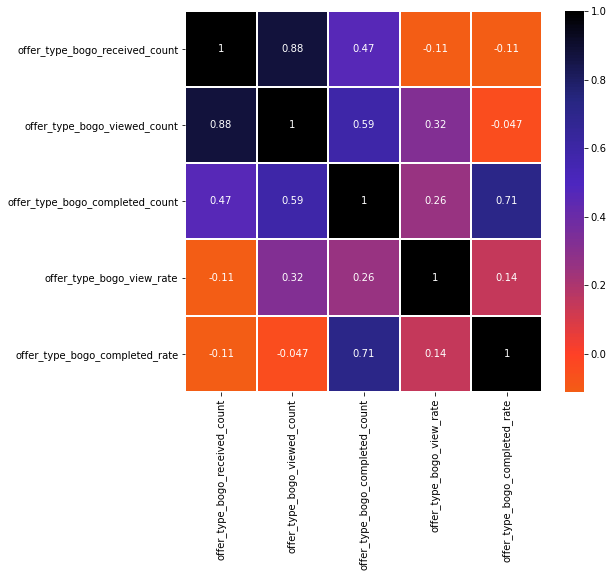

In [20]:
offer_bogo = profile_offer[['customer_id','offer_type_bogo_received_count',
 'offer_type_bogo_viewed_count',
 'offer_type_bogo_completed_count',
 'offer_type_bogo_view_rate',
 'offer_type_bogo_completed_rate']]

plt.figure(figsize=(8, 7))
sns.heatmap(offer_bogo.corr(), annot=True, linewidths=1, center=0, cmap = "CMRmap_r")

### Analyse Offer1 2 4 9

In [21]:
offer1_data = profile_offer[['offer_name_offer_1_received_count','offer_name_offer_1_viewed_count',
 'offer_name_offer_1_completed_count','offer_name_offer_1_view_rate','offer_name_offer_1_completed_rate']]
offer1_data.columns = offer1_data.columns.str.replace("offer_name_", "")

offer2_data = profile_offer[['offer_name_offer_2_received_count','offer_name_offer_2_viewed_count',
 'offer_name_offer_2_completed_count','offer_name_offer_2_view_rate','offer_name_offer_2_completed_rate']]

offer2_data.columns = offer2_data.columns.str.replace("offer_name_", "")

offer4_data = profile_offer[['offer_name_offer_4_received_count','offer_name_offer_4_viewed_count',
 'offer_name_offer_4_completed_count','offer_name_offer_4_view_rate','offer_name_offer_4_completed_rate']]

offer4_data.columns = offer4_data.columns.str.replace("offer_name_", "")

offer9_data = profile_offer[['offer_name_offer_9_received_count','offer_name_offer_9_viewed_count',
 'offer_name_offer_9_completed_count','offer_name_offer_9_view_rate','offer_name_offer_9_completed_rate']]

offer9_data.columns = offer9_data.columns.str.replace("offer_name_", "")

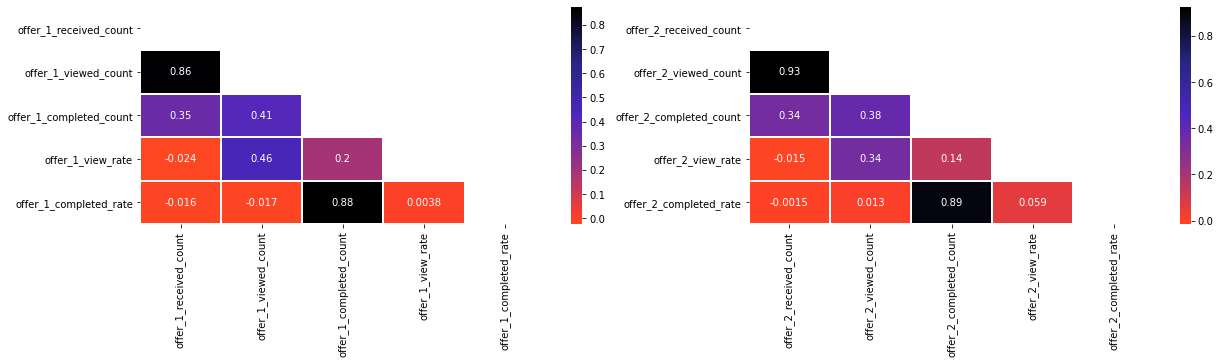

In [22]:
fig, axs =  plt.subplots(ncols=2, figsize=(20, 4))


corr = offer1_data.corr()
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,  mask = matrix, linewidths=1, center=0, cmap = "CMRmap_r", ax=axs[0])


corr = offer2_data.corr()
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,  mask = matrix, linewidths=1, center=0, cmap = "CMRmap_r", ax=axs[1])

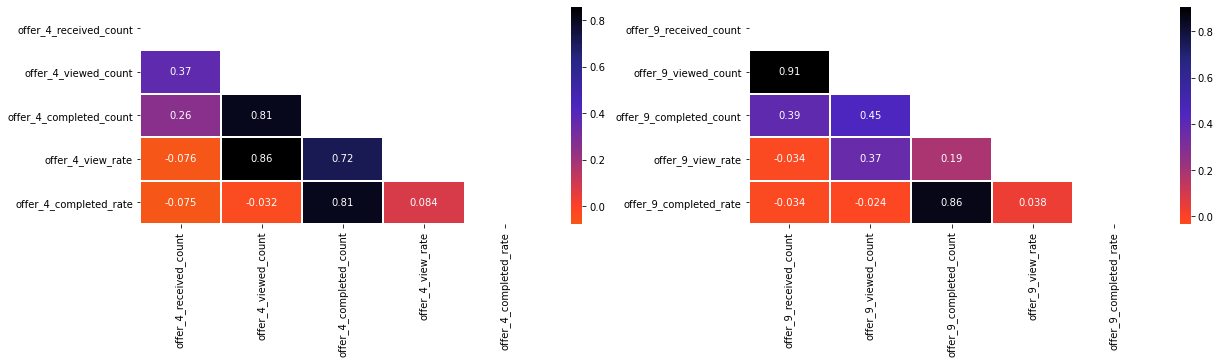

In [23]:
fig, axs =  plt.subplots(ncols=2, figsize=(20, 4))

corr = offer4_data.corr()
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,  mask = matrix, linewidths=1, center=0, cmap = "CMRmap_r", ax=axs[0])


corr = offer9_data.corr()
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,  mask = matrix, linewidths=1, center=0, cmap = "CMRmap_r", ax=axs[1])

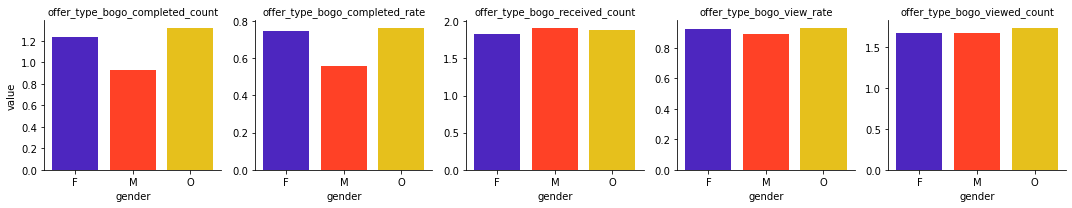

In [106]:
df = plot_data(offer_bogo,profile_offer,  groupby = 'gender',palette =3,col_wrap=5,height=3,label_rotation =0)

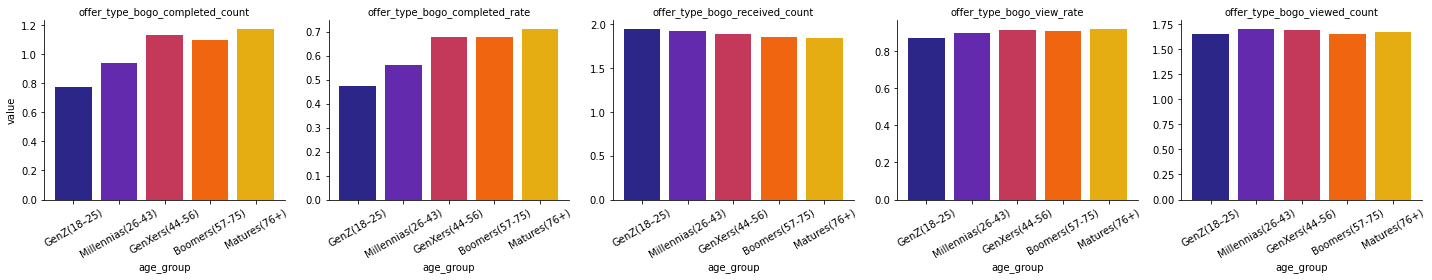

In [107]:
df = plot_data(offer_bogo,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=4,label_rotation =30)

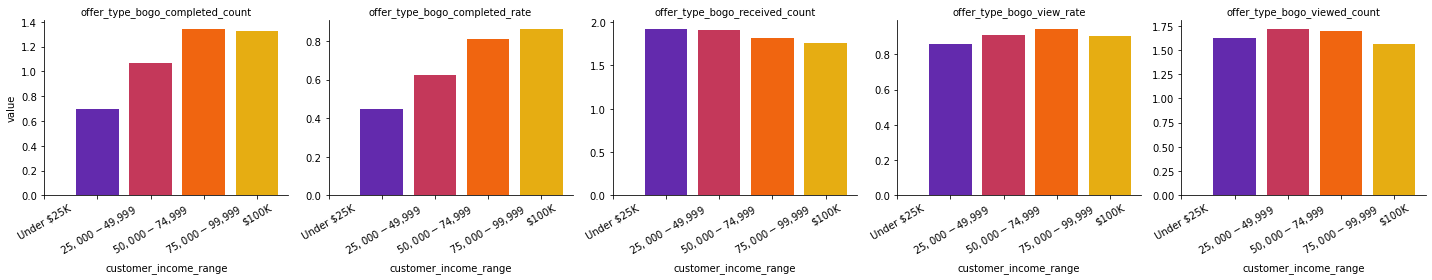

In [111]:
df = plot_data(offer_bogo,profile_offer,  groupby = 'customer_income_range',palette =6,col_wrap=5,height=4,label_rotation =30)

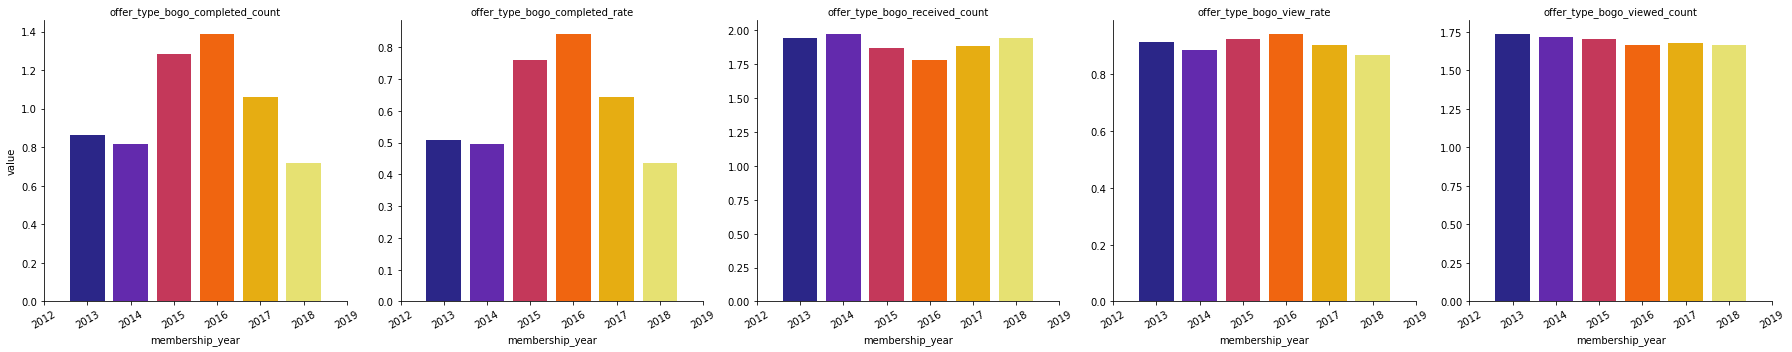

In [112]:
df = plot_data(offer_bogo,profile_offer,  groupby = 'membership_year', palette =6,col_wrap=5,height=5,label_rotation =30)

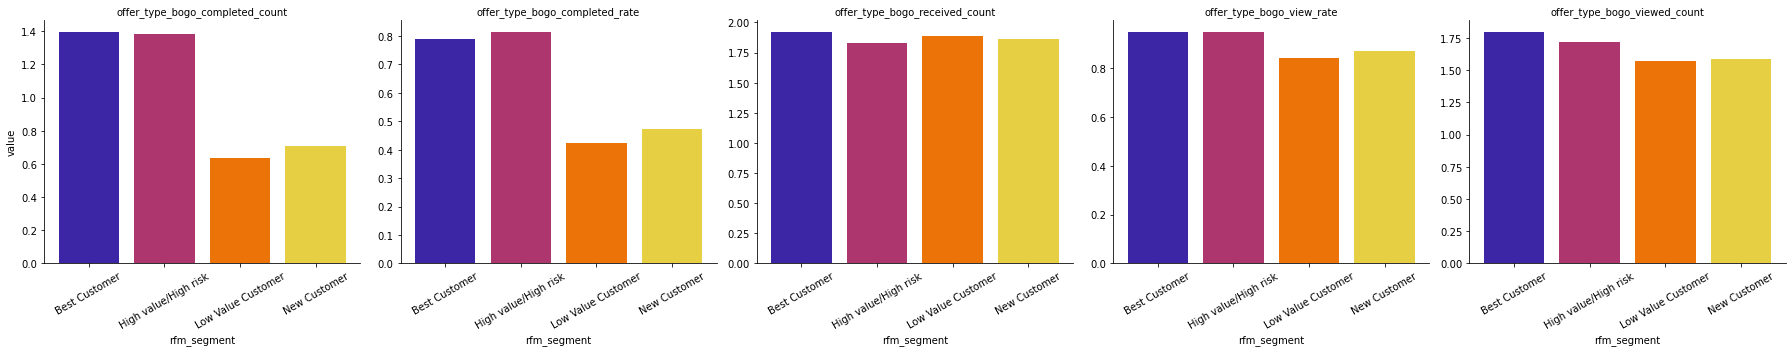

In [113]:
df = plot_data(offer_bogo,profile_offer,  groupby = 'rfm_segment',palette =4,col_wrap=5,height=5,label_rotation =30)

# Offer Discount

<AxesSubplot:>

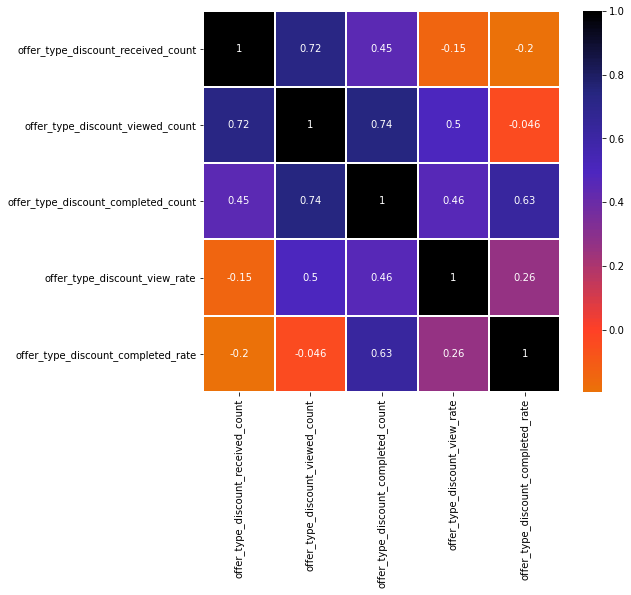

In [83]:
offer_discount = profile_offer[['customer_id','offer_type_discount_received_count',
 'offer_type_discount_viewed_count',
 'offer_type_discount_completed_count',
 'offer_type_discount_view_rate',
 'offer_type_discount_completed_rate']]

plt.figure(figsize=(8, 7))
sns.heatmap(offer_discount.corr(), annot=True, linewidths=1, center=0, cmap = "CMRmap_r")

In [30]:
offer5_data = profile_offer[['offer_name_offer_5_received_count','offer_name_offer_5_viewed_count',
 'offer_name_offer_5_completed_count','offer_name_offer_5_view_rate','offer_name_offer_5_completed_rate']]
offer5_data.columns = offer5_data.columns.str.replace("offer_name_", "")

offer6_data = profile_offer[['offer_name_offer_6_received_count','offer_name_offer_6_viewed_count',
 'offer_name_offer_6_completed_count','offer_name_offer_6_view_rate','offer_name_offer_6_completed_rate']]

offer6_data.columns = offer6_data.columns.str.replace("offer_name_", "")

offer7_data = profile_offer[['offer_name_offer_7_received_count','offer_name_offer_7_viewed_count',
 'offer_name_offer_7_completed_count','offer_name_offer_7_view_rate','offer_name_offer_7_completed_rate']]

offer7_data.columns = offer7_data.columns.str.replace("offer_name_", "")

offer10_data = profile_offer[['offer_name_offer_10_received_count','offer_name_offer_10_viewed_count',
 'offer_name_offer_10_completed_count','offer_name_offer_10_view_rate','offer_name_offer_10_completed_rate']]

offer10_data.columns = offer10_data.columns.str.replace("offer_name_", "")

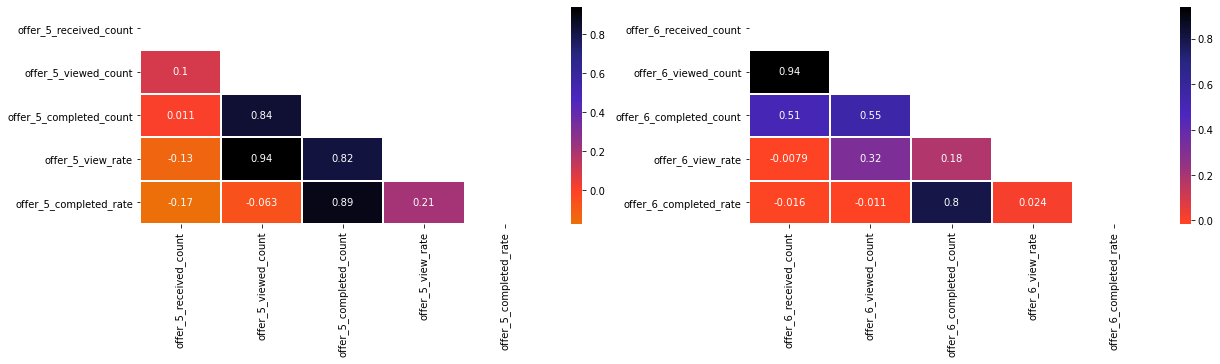

In [31]:
fig, axs =  plt.subplots(ncols=2, figsize=(20, 4))


corr = offer5_data.corr()
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,  mask = matrix, linewidths=1, center=0, cmap = "CMRmap_r", ax=axs[0])


corr = offer6_data.corr()
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,  mask = matrix, linewidths=1, center=0, cmap = "CMRmap_r", ax=axs[1])

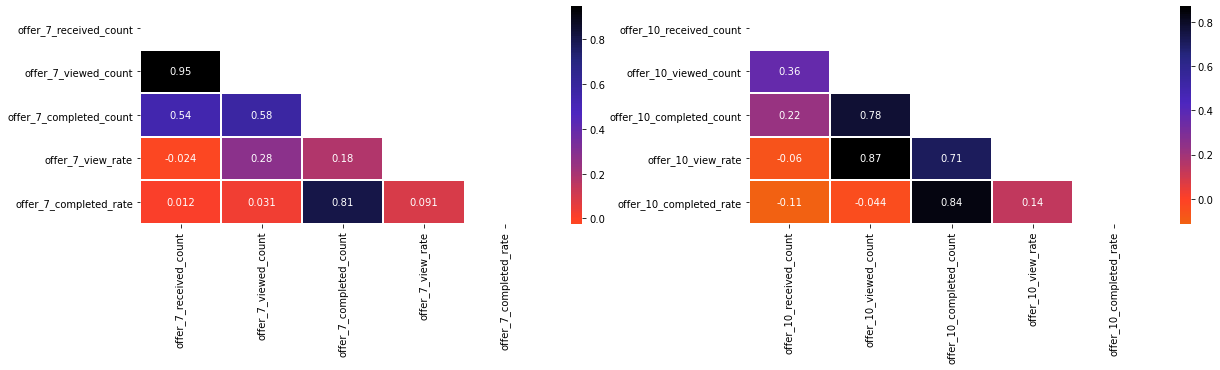

In [32]:
fig, axs =  plt.subplots(ncols=2, figsize=(20, 4))


corr = offer7_data.corr()
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,  mask = matrix, linewidths=1, center=0, cmap = "CMRmap_r", ax=axs[0])


corr = offer10_data.corr()
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot=True,  mask = matrix, linewidths=1, center=0, cmap = "CMRmap_r", ax=axs[1])

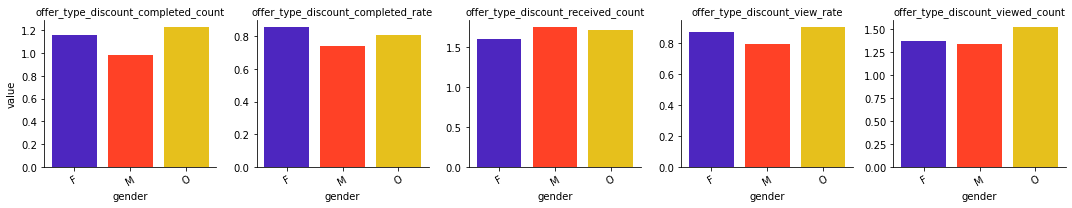

In [114]:
df = plot_data(offer_discount,profile_offer,  groupby = 'gender',palette =3,col_wrap=5,height=3,label_rotation =30)

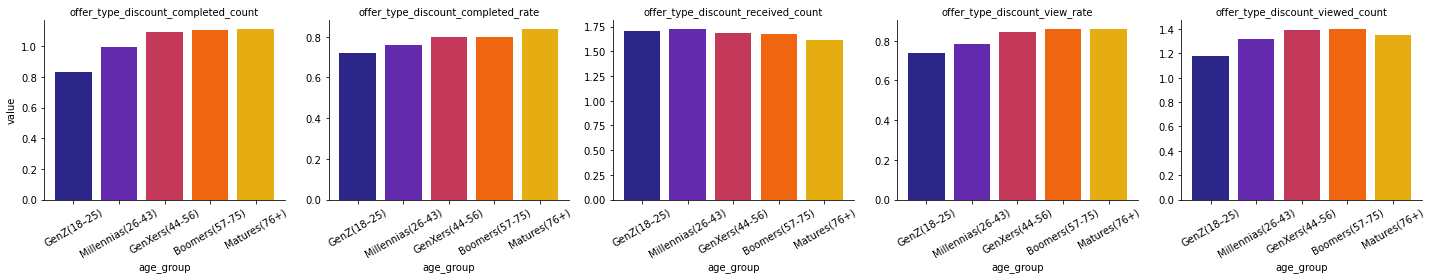

In [115]:
df = plot_data(offer_discount,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=4,label_rotation =30)

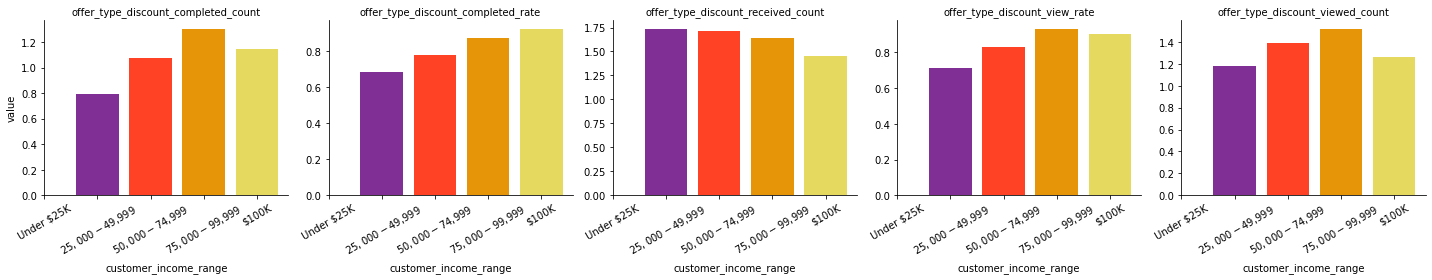

In [116]:
df = plot_data(offer_discount,profile_offer,  groupby = 'customer_income_range',palette =5,col_wrap=5,height=4,label_rotation =30)

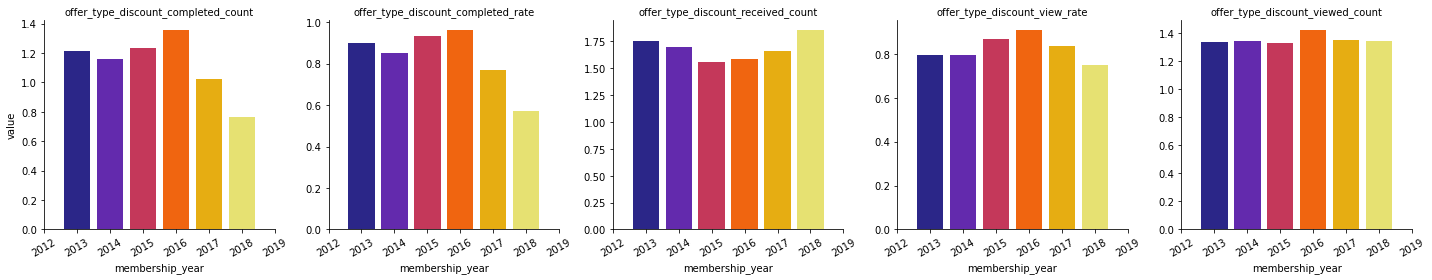

In [117]:
df = plot_data(offer_discount,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=5,height=4,label_rotation =30)


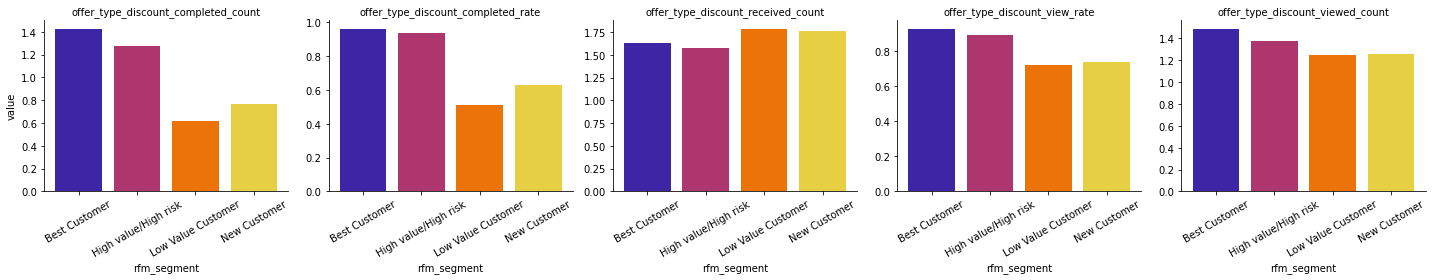

In [119]:
df = plot_data(offer_discount,profile_offer,  groupby = 'rfm_segment',palette =4,col_wrap=5,height=4,label_rotation =30)

## Offer Information

<AxesSubplot:>

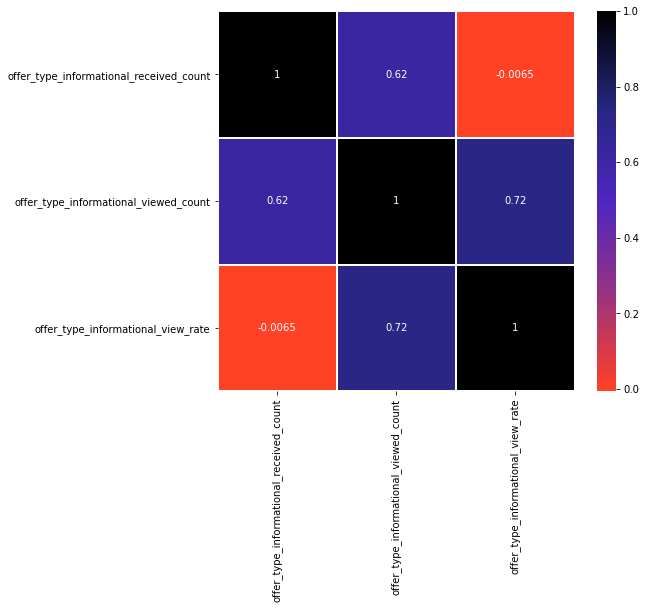

In [41]:
offer_informational = profile_offer[['customer_id', 'offer_type_informational_received_count',
 'offer_type_informational_viewed_count',
 'offer_type_informational_view_rate']]

plt.figure(figsize=(8, 7))
sns.heatmap(offer_informational.corr(), annot=True, linewidths=1, center=0, cmap = "CMRmap_r")

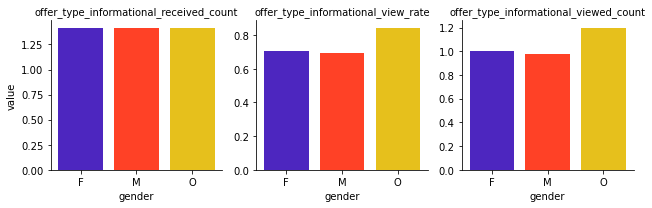

In [139]:
df = plot_data(offer_informational ,profile_offer,  groupby = 'gender',palette =3,col_wrap=3,height=3,label_rotation =0)


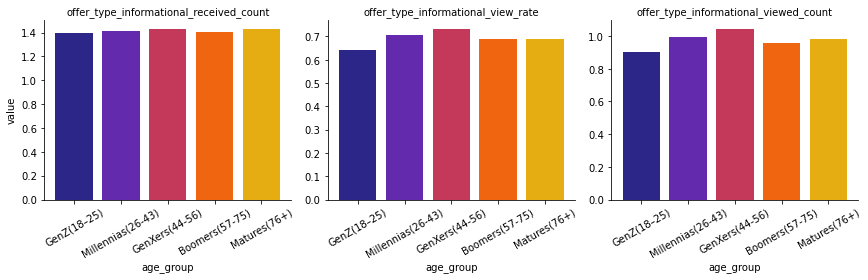

In [140]:
df = plot_data(offer_informational,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=4,label_rotation =30)


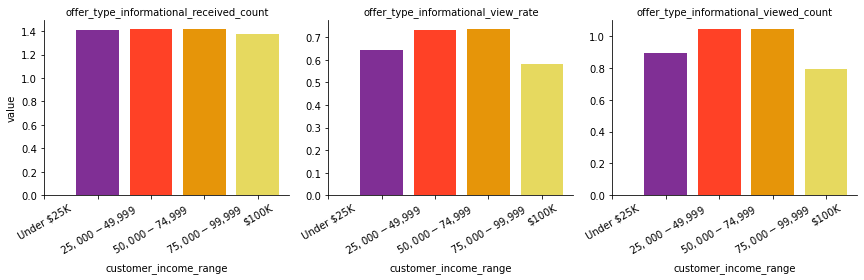

In [141]:
df = plot_data(offer_informational,profile_offer,  groupby = 'customer_income_range',palette =5,col_wrap=5,height=4,label_rotation =30)


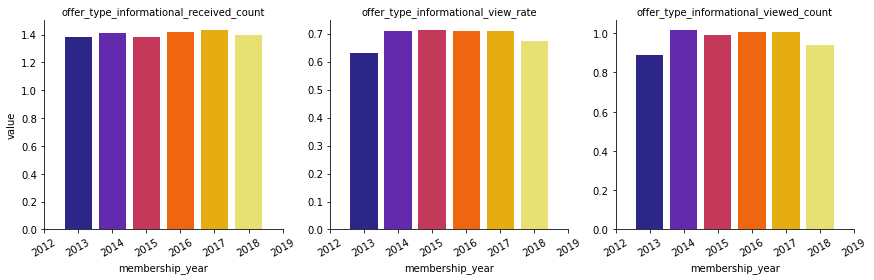

In [132]:
df = plot_data(offer_informational,profile_offer,  groupby = 'membership_year',palette =6,col_wrap=5,height=4,label_rotation =30)


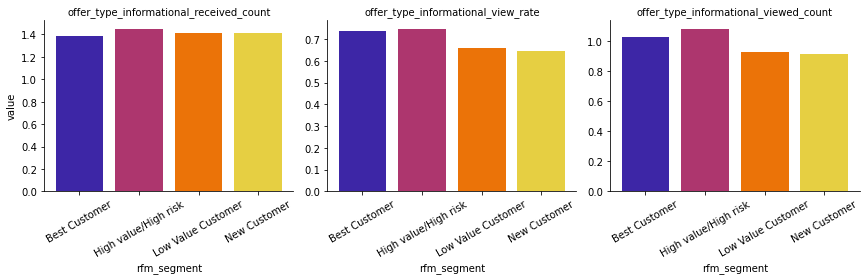

In [128]:
df = plot_data(offer_informational,profile_offer,  groupby = 'rfm_segment',palette =4,col_wrap=5,height=4,label_rotation =30)

## Offer Difficulty 5

In [102]:
offer_difficulty =  profile_offer[['customer_id',
 'offer_difficulty_5_completed_rate',
 'offer_difficulty_20_completed_rate',
 'offer_difficulty_10_completed_rate',
 'offer_difficulty_7_completed_rate']]

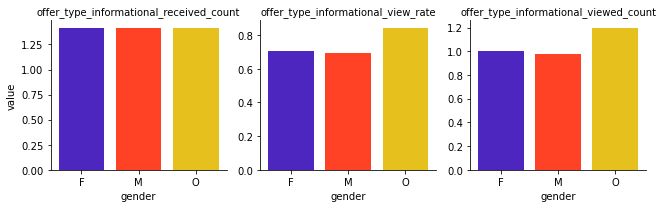

In [135]:
df = plot_data(offer_informational ,profile_offer,  groupby = 'gender',palette =3,col_wrap=5,height=3,label_rotation =0)

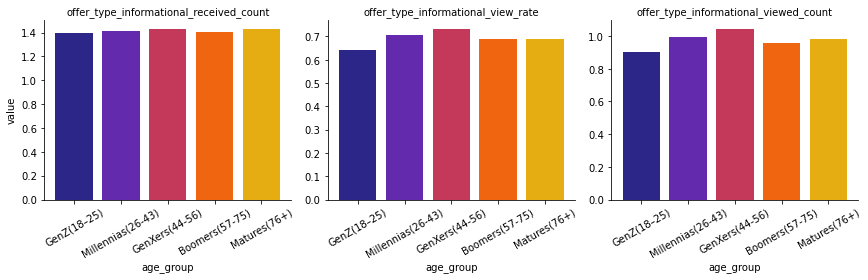

In [138]:
df = plot_data(offer_informational,profile_offer,  groupby = 'age_group',palette =6,col_wrap=5,height=4,label_rotation =30)

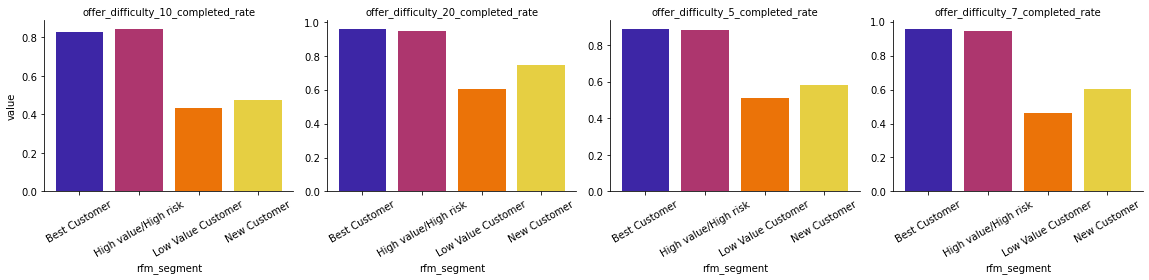

In [133]:
df = plot_data(offer_difficulty,profile_offer,  groupby = 'rfm_segment',palette =4,col_wrap=5,height=4,label_rotation =30)

In [100]:
 offer_duration =  profile_offer[['offer_duration_7_view_rate',
 'offer_duration_7_completed_rate',
 'offer_duration_10_view_rate',
 'offer_duration_10_completed_rate',
 'offer_duration_5_view_rate',
 'offer_duration_5_completed_rate']]
    
sns.set_palette(sns.color_palette("CMRmap",4))
g = sns.FacetGrid(df, col='variable', hue= 'rfm_segment', col_wrap=4, height=4, sharey=False)
g = g.map(plt.bar, 'rfm_segment', 'value').set_titles("{col_name}")
g.set_xticklabels(rotation = 30)
g.tight_layout()